In [26]:
from dataProcessing import DataProcessor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]

In [2]:
data_processor = DataProcessor()
df = data_processor.read_data('data/Desafio 2 - renner_sales_sample_train.csv')
df = data_processor.clean(df, test=False)
df = data_processor.features(df)
df.head()

,loja,data,venda,loja_web,index,c_br,c_uy,s_al,s_am,s_ap,s_ba,s_ce,s_df,s_es,s_ex,s_go,s_ma,s_mg,s_ms,s_mt,s_pa,s_pb,s_pe,s_pi,s_pr,s_rj,s_rn,s_ro,s_rr,s_rs,s_sc,s_se,s_sp,s_to,week_of_year,year,store_avg,store_std,holiday
0,renner_ar_ex_1,2019-12-08,68,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,2019,46.319672,68.294485,0
1,renner_ar_ex_1,2019-12-15,376,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,2019,46.319672,68.294485,0
2,renner_ar_ex_1,2019-12-22,345,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,2019,46.319672,68.294485,1
3,renner_ar_ex_1,2019-12-29,219,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,2019,46.319672,68.294485,1
4,renner_ar_ex_1,2020-01-05,140,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2020,46.319672,68.294485,1


In [3]:
df_test = data_processor.read_data('data/Desafio 2 - renner_sales_sample_test.csv')
df_test = data_processor.clean(df_test, test=True)

store_avgs = df.groupby('loja')['venda'].mean()
store_stds = df.groupby('loja')['venda'].std()

df_test = data_processor.features(df_test, test=True, store_avgs=store_avgs, store_stds=store_stds)
df_test.head()

,loja,data,venda,loja_web,index,c_br,c_uy,s_al,s_am,s_ap,s_ba,s_ce,s_df,s_es,s_ex,s_go,s_ma,s_mg,s_ms,s_mt,s_pa,s_pb,s_pe,s_pi,s_pr,s_rj,s_rn,s_ro,s_rr,s_rs,s_sc,s_se,s_sp,s_to,week_of_year,year,store_avg,store_std,holiday
0,renner_ar_ex_1,2022-04-10,12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,2022,46.319672,68.294485,0
1,renner_ar_ex_1,2022-04-17,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,2022,46.319672,68.294485,1
2,renner_ar_ex_1,2022-04-24,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,2022,46.319672,68.294485,1
3,renner_ar_ex_1,2022-05-01,12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,2022,46.319672,68.294485,1
4,renner_ar_ex_1,2022-05-08,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,2022,46.319672,68.294485,0


In [31]:
df.groupby('loja')['data'].count().sort_values(ascending=False)

loja
renner_br_rj_85     275
renner_br_rs_52     275
renner_br_rs_40     275
renner_br_rs_38     275
renner_br_rs_37     275
                   ... 
renner_br_sp_171     45
renner_br_rn_52      44
renner_br_go_47      42
renner_br_pe_53      40
renner_br_rs_71      34
Name: data, Length: 406, dtype: int64

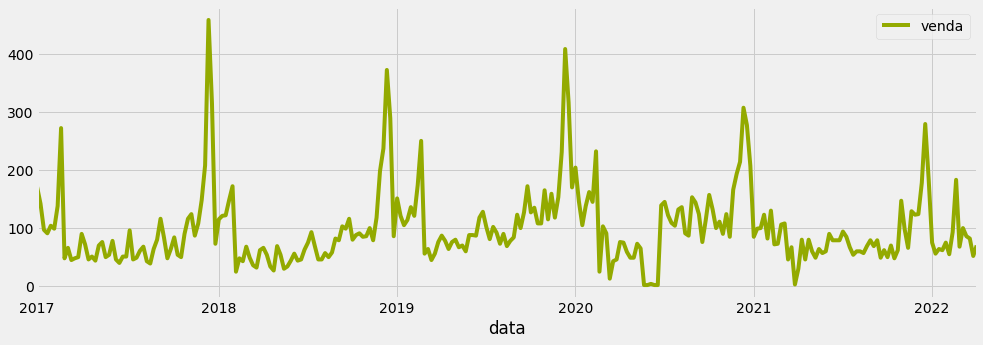

In [32]:
df[df.loja=='renner_br_rj_85'].plot('data', 'venda', figsize=(15,5), color=color_pal[2])
plt.show()

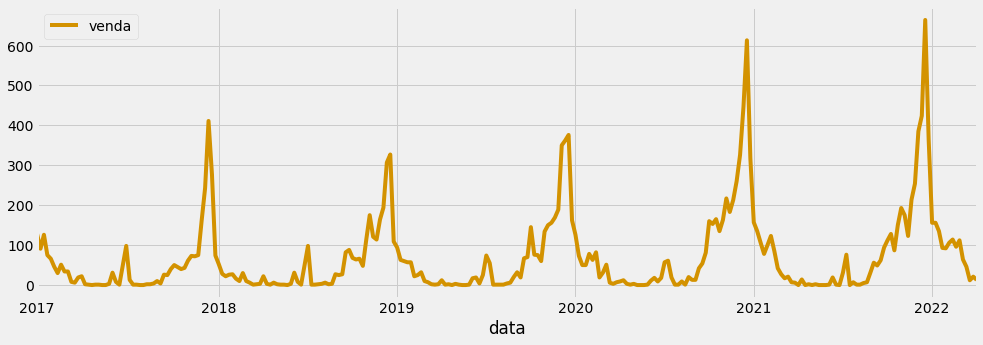

In [47]:
df[df.loja=='renner_br_rs_52'].plot('data', 'venda', figsize=(15,5), color=color_pal[1])
plt.show()

In [48]:
df.to_csv('train_data.csv')
df_test.to_csv('test_data.csv')